<h2 align="center"> Logistic Regression -- A Titanic Survival Prediction Case Study

### Titanic Dataset –
* It is one of the most popular datasets used for understanding machine learning basics. 
* It contains information of all the passengers aboard the RMS Titanic, which unfortunately was shipwrecked. 
* This dataset can be used to predict whether a given passenger survived or not.
* The csv file can be downloaded from Kaggle.

### Process of Machine Learning invlove the following step

* STEP 1> DATA COLLECTION
* STEP 2> CLEANING OF RAW DATA
* STEP 3> EDA/FE (exploratory data analysis)/(feature extraction)
* STEP 4> DATA SPLIT TRAIN/TEST
* STEP 5> MODEL SELECTION AND MODEL TRAINING ON TRAINING DATASET
* STEP 6> MODEL TEST ON TESING DATASET
* STEP 7> MODEL EVALUTION 
* STEP 8> FINAL MODEL AND RESULT

# Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings(action='ignore')

## Loading Dataset

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
len(df)

891

In [4]:
df.shape

(891, 12)

# Cleaning of Raw Data

### Checking Null Values 

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* As the total 891 rows , In 'Cabin' there are more than 70% data is missing , so it is irrelevant to fill it 

* Now, dropping Cabin column

In [6]:
df.pop('Cabin')

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

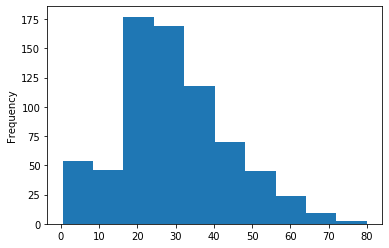

In [7]:
df['Age'].plot.hist()

* as Curve is Bell Shaped , so fill the missing values by Mean

In [8]:
df['Age'].fillna(df['Age'].mean(), inplace= True)

* Embarked column is categorical so calculating the mode and filling it 

In [9]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

* We observe that max people are from S-southampton so we fill all with S

In [10]:
df["Embarked"].fillna(value='S',inplace=True)

* Now checking missing values

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

* All missing values are filled now , 

## Droping Irrelevent columns 

* As the name column contain different name and the survival is not relevant to names
* passenger Id does not make any sense

In [12]:
df.drop(['PassengerId','Name'], axis=1, inplace=True)

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


* Ticket number doesnt provide any relevant information whether they survived or not so drop it

In [14]:
df.pop('Ticket')

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

* now data only conatin relevant columns

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


* lets change all text to numeric using dummy and label encoding

In [16]:
gender=pd.get_dummies(df["Sex"], drop_first=True)
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


* Label Encoding it encode the value as per given instance
- Eg- columns has 3 category C/S/Q--it will form label
    suppose 0-C, 1-S, 2-Q

In [17]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
df["Embarked"] = lab.fit_transform(df["Embarked"])
df["Embarked"].head(10)

0    2
1    0
2    2
3    2
4    2
5    1
6    2
7    2
8    2
9    0
Name: Embarked, dtype: int32

* Concatinating Sex column to original dataframe 

In [18]:
df = pd.concat((df,gender),axis=1)
df = df.drop(["Sex"],axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int32  
 7   male      891 non-null    uint8  
dtypes: float64(2), int32(1), int64(4), uint8(1)
memory usage: 46.2 KB


### Features: The titanic dataset has roughly the following types of features:

* Categorical/Nominal: Variables that can be divided into multiple categories but having no order or priority.
Eg. Embarked (C = Cherbourg; Q = Queenstown; S = Southampton)
* Binary: A subtype of categorical features, where the variable has only two categories.
Eg: Sex (Male/Female)
* Ordinal: They are similar to categorical features but they have an order(i.e can be sorted).
Eg. Pclass (1, 2, 3)
* Continuous: They can take up any value between the minimum and maximum values in a column.
Eg. Age, Fare
* Count: They represent the count of a variable.
Eg. SibSp, Parch

Useless: They don’t contribute to the final outcome of an ML model. Here, PassengerId, Name, Cabin and Ticket might fall into this category.

# EDA 

* I am prefering Raw Data for EDA : (not cleaned data)

In [20]:
# sns.catplot(x ="male", hue ="Survived", 
# kind ="count", data = df)

""" Raw Data """

eda =  pd.read_csv('train.csv')

In [21]:
eda.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


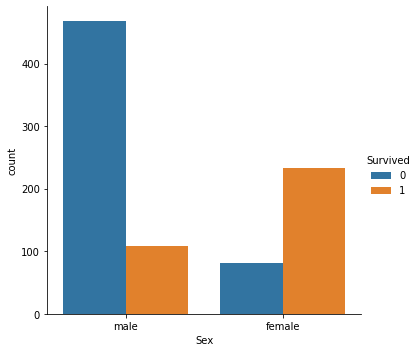

In [22]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = eda)

* Just by observing the graph, it can be approximated that the survival rate of men is around 20% and that of women is around 75%. Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.

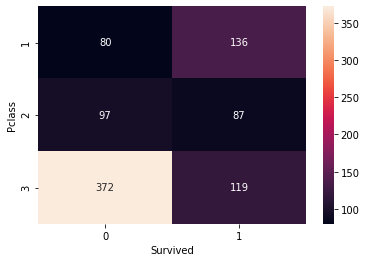

In [23]:
# Group the dataset by Pclass and Survived and then unstack them 

group = eda.groupby(['Pclass', 'Survived']) 
pclass_survived = group.size().unstack() 

# Heatmap - Color encoded 2D representation of data. 

sns.heatmap(pclass_survived, annot = True, fmt ="d") 

It helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa. Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate.

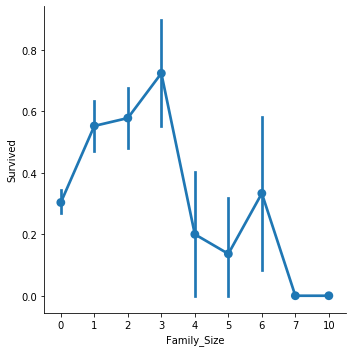

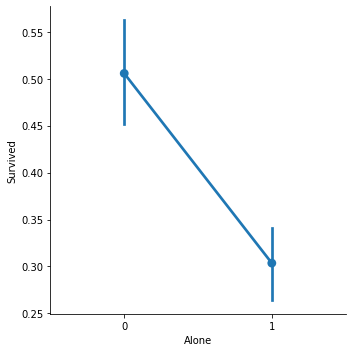

In [24]:
# Adding a column Family_Size 

eda['Family_Size'] = 0
eda['Family_Size'] = eda['Parch'] + eda['SibSp'] 

# Adding a column Alone 

eda['Alone'] = 0
eda.loc[eda.Family_Size == 0, 'Alone'] = 1

# Factorplot for Family_Size 

sns.factorplot(x ='Family_Size', y ='Survived', data =eda) 

# Factorplot for Alone 

sns.factorplot(x ='Alone', y ='Survived', data = eda) 


Family_Size denotes the number of people in a passenger’s family. It is calculated by summing the SibSp and Parch columns of a respective passenger. Also, another column Alone is added to check the chances of survival of a lone passenger against the one with a family.

Important observations –

If a passenger is alone, the survival rate is less.
If the family size is greater than 5, chances of survival decreases considerably.

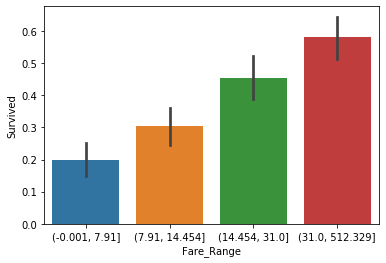

In [25]:
# Divide Fare into 4 bins 
eda['Fare_Range'] = pd.qcut(eda['Fare'], 4) 

# Barplot - Shows approximate values based 
# on the height of bars. 
sns.barplot(x ='Fare_Range', y ='Survived', 
data =eda) 

Fare denotes the fare paid by a passenger. As the values in this column are continuous, they need to be put in separate bins(as done for Age feature) to get a clear idea. It can be concluded that if a passenger paid a higher fare, the survival rate is more.


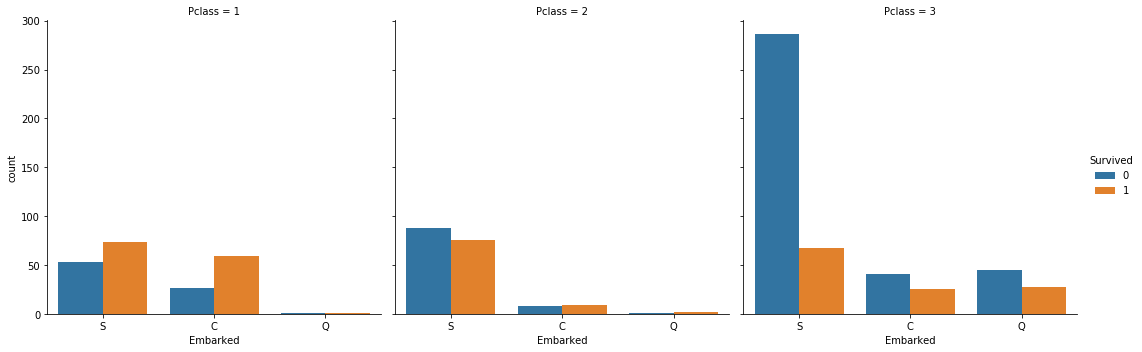

In [26]:
sns.catplot(x ='Embarked', hue ='Survived', 
kind ='count', col ='Pclass', data =eda) 

## Spliting Data into Dependent Variable and Independent variable

In [27]:
y = df["Survived"]
X = df.drop(["Survived"],axis=1)

In [28]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,3,22.0,1,0,7.2500,2,1
1,1,38.0,1,0,71.2833,0,0
2,3,26.0,0,0,7.9250,2,0
3,1,35.0,1,0,53.1000,2,0
4,3,35.0,0,0,8.0500,2,1


In [29]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Spliting data into 70-30 ratio 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [31]:
print("size of train set :",X_train.shape)
print("Size of test set :",X_test.shape)

size of train set : (623, 7)
Size of test set : (268, 7)


## Train the model using Logistic Regression

In [32]:
model=LogisticRegression()

In [33]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0]


### Check Accuracy of Model

In [35]:
print("Accuracy of model is :",accuracy_score(y_test,y_pred))

Accuracy of model is : 0.8134328358208955


## Model Evaluation 

* Classification Report 

In [36]:
print("MODEL CLASSIFICAITON REPORT: \n ",classification_report(y_test,y_pred))

MODEL CLASSIFICAITON REPORT: 
                precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



* Confusion Matrix

In [37]:
print("Confusion matrix is")
print(confusion_matrix(y_test,y_pred))

Confusion matrix is
[[137  20]
 [ 30  81]]


# Test DataSet

In [88]:
test_data = pd.read_csv('test.csv')

In [89]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Cleaning

In [90]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [91]:
test_data.pop('Cabin')

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 418, dtype: object

In [92]:
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

In [93]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [94]:
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True)

In [95]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [96]:
test_data.drop(['Name','PassengerId','Ticket'],axis=1, inplace=True)

In [97]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


In [98]:
gender = pd.get_dummies(test_data["Sex"],drop_first=True)
gender.head()

,male
0,1
1,0
2,1
3,1
4,0


In [99]:
le = LabelEncoder()
test_data["Embarked"]=le.fit_transform(test_data["Embarked"])

In [100]:
test_data=pd.concat((test_data,gender),axis=1)
test_data=test_data.drop(["Sex"],axis=1)

In [101]:
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,3,34.5,0,0,7.8292,1,1
1,3,47.0,1,0,7.0000,2,0
2,2,62.0,0,0,9.6875,1,1
3,3,27.0,0,0,8.6625,2,1
4,3,22.0,1,1,12.2875,2,0


# Prediction on Test Data

In [102]:
pred = model.predict(test_data)

In [103]:
gen =  pd.read_csv('gender_submission.csv')

In [104]:
gen.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [105]:
test_data = pd.concat((test_data,gen),axis=1)

In [106]:
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,male,PassengerId,Survived
0,3,34.5,0,0,7.8292,1,1,892,0
1,3,47.0,1,0,7.0000,2,0,893,1
2,2,62.0,0,0,9.6875,1,1,894,0
3,3,27.0,0,0,8.6625,2,1,895,0
4,3,22.0,1,1,12.2875,2,0,896,1


In [107]:
test_data.drop(['PassengerId'], axis=1, inplace=True)

In [108]:
test_data

,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Survived
0,3,34.50000,0,0,7.8292,1,1,0
1,3,47.00000,1,0,7.0000,2,0,1
2,2,62.00000,0,0,9.6875,1,1,0
3,3,27.00000,0,0,8.6625,2,1,0
4,3,22.00000,1,1,12.2875,2,0,1
...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,2,1,0
414,1,39.00000,0,0,108.9000,0,0,1
415,3,38.50000,0,0,7.2500,2,1,0
416,3,30.27259,0,0,8.0500,2,1,0


In [109]:
y_test_pred = test_data.iloc[:,-1]

In [110]:
y_test_pred

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

# Checking Accuracy

In [111]:
print("Accuracy of model is :",accuracy_score(y_test_pred,pred))

Accuracy of model is : 0.9401913875598086


In [114]:
print(classification_report(y_test_pred, pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       266
           1       0.92      0.92      0.92       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



In [113]:
print(confusion_matrix(y_test_pred,pred))

[[253  13]
 [ 12 140]]
